<div style="text-align: center">
<img src="https://raw.githubusercontent.com/xyizko/xo-mathz/refs/heads/main/gfx/x.jpeg">    
<img src="https://raw.githubusercontent.com/xyizko/xo-tagz/refs/heads/main/gfx/i.png">
</div>
<div style="background: black; color: #00ff00; padding: 2px; text-align: center;background-size: cover; padding: 10px; text-shadow: 00 0 20px #ec4899">
    <h1> Pandas Tutorial 2.1 </h1>
    
</div>

In [1]:
# Python BeautyPanty 

import logging
from rich import print as rprint  # For rprinting
from rich.pretty import pprint  # For pretty printing
from rich import inspect  # For inspect

from rich.console import Console  # For console.print
from rich.markdown import Markdown  # For markdow
from rich.panel import Panel  # For Panel()
from rich import box  # For Panel Boxes
from rich.prompt import Prompt  # For Prompting
from rich.style import Style  # For styles colors
from rich.text import Text  # For text Styles
from rich.logging import RichHandler
from rich.traceback import install
from rich.rule import Rule # Horizontal Line
import numpy as np
import random

console = Console()  # Standard code to access console
install(show_locals=True)

# Setting up rich logger with color
logging.basicConfig(
    level=logging.DEBUG,
    format="%(message)s",
    datefmt="[%X]",
    handlers=[RichHandler(rich_tracebacks=True, markup=True)],
)
log = logging.getLogger("rich")

# Horizontal Line 
def dividerz(title: str = "", color: str = ""):
    console.print(Rule(f"{title}", style=f"{color}"))

# boxa
def boxa(txt: str = "", title: str = "", subtitle: str = "", brd: str = ""):
    console.print(Panel.fit(f"{txt}",
                            title=f"{title}",
                            subtitle=f"{subtitle}", 
                            style="Italic", 
                            border_style=f"{brd}"))

# Pandas Specific 
import pandas as pd # Dataframe
import numpy as np # Numerical Operations
from scipy import stats # Stats from scipy
import seaborn as sns # Seasborn Plots

# Matplotlib and setting dark mode
import matplotlib.pyplot as plt
# Setting Dark Mode
plt.style.use('dark_background')


# TOC
1. [What?](#What?)
2. [PLots](#Plotting)


[🔙](#TOC)

# What 

1. Contination of pandas usage and more cocepts
2. Seaborn plots (SNS) also have color pallettes to choose from - [`HERE`](https://seaborn.pydata.org/tutorial/color_palettes.html)


## Airlines DS

In [2]:
# Importing airlines data set as a1

URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
a1 = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")
a1

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# Make new Df dropping index 

a1c = a1.copy()

In [4]:
# Drop column index 
a1c = a1c.drop(columns = 'index')

In [5]:
a1c

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


[🔙](#TOC)

# Plotting

<Axes: >

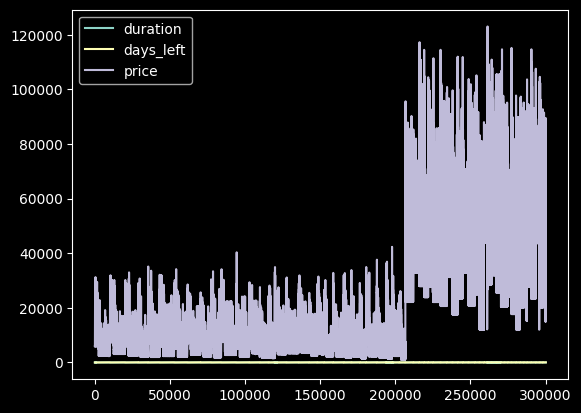

In [6]:
# testing plots
a1c.plot()

## General Plots

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


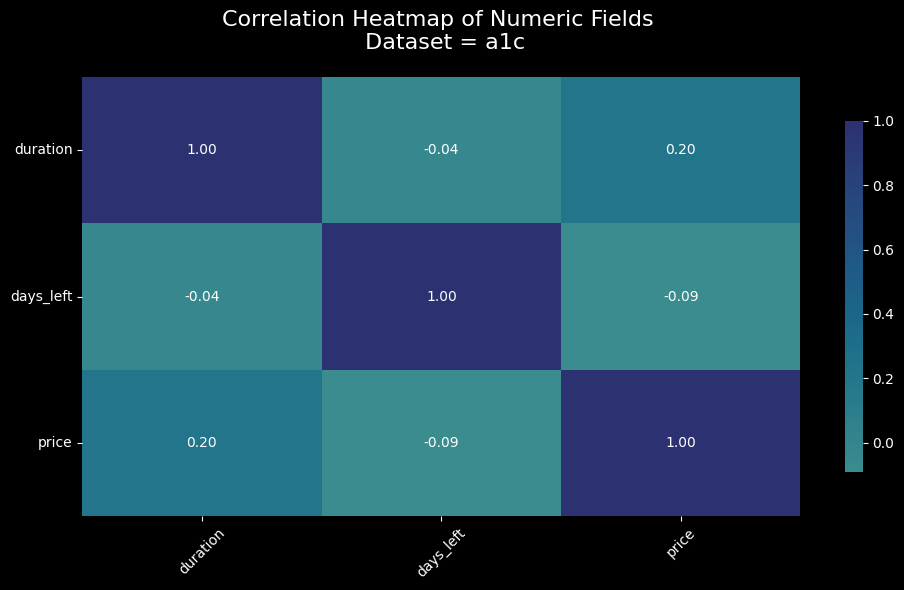

In [7]:
# Make Pearons correlation of all numeric fields 

def pear1():

    # Seleect only numeric types 
    numeric_df = a1c.select_dtypes(include='number') 

    # Make a correlation  matrix 
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 6))

    # Generate a mask for the upper triangle (optional, for cleaner look)
    sns.heatmap(
        corr_matrix,
        annot=True,           # Show correlation values in cells
        cmap='crest',      # Color scheme: red = positive, blue = negative
        center=0,             # Center color at zero
        square=False,         # Cells don't need to be square
        fmt='.2f',            # Format numbers to 2 decimal places
        cbar_kws={"shrink": 0.8}  # Shrink color bar
    )
    
    plt.title("Correlation Heatmap of Numeric Fields \n Dataset = a1c", fontsize=16, pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

pear1()

<Axes: >

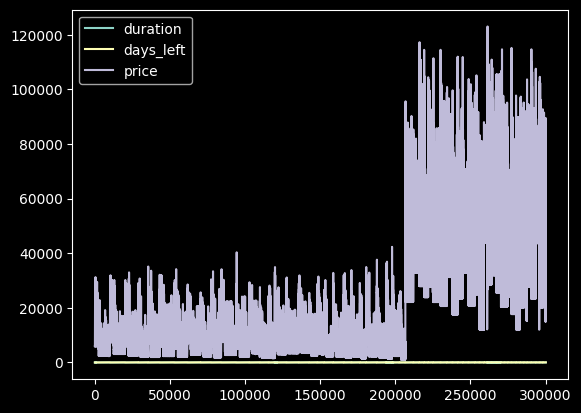

In [8]:
# Default plots - 

a1c.plot()

<Axes: title={'center': 'Flight Price vs Duration'}, xlabel='duration', ylabel='price'>

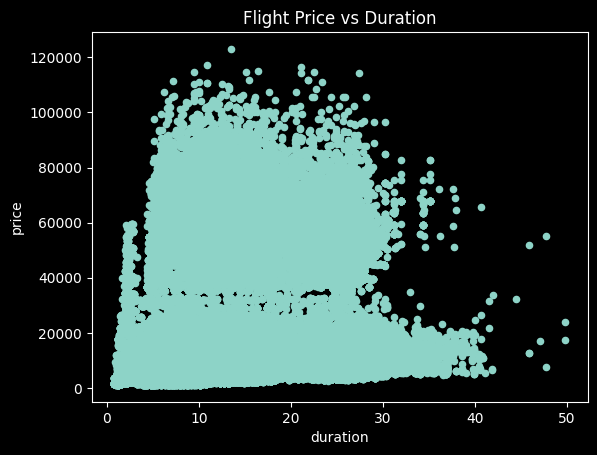

In [9]:
# Price vs Duration (if duration is numeric)
a1c.plot(x='duration', y='price', kind='scatter', title='Flight Price vs Duration')

<Axes: title={'center': 'Distribution of Flight Prices'}, ylabel='Frequency'>

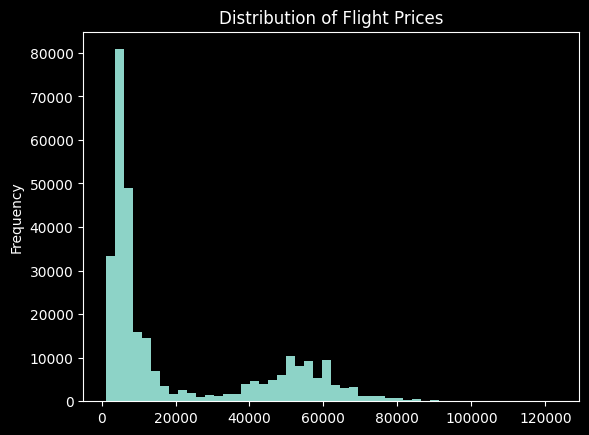

In [10]:
# Price distribution histogram
a1c['price'].plot(kind='hist', bins=50, title='Distribution of Flight Prices')

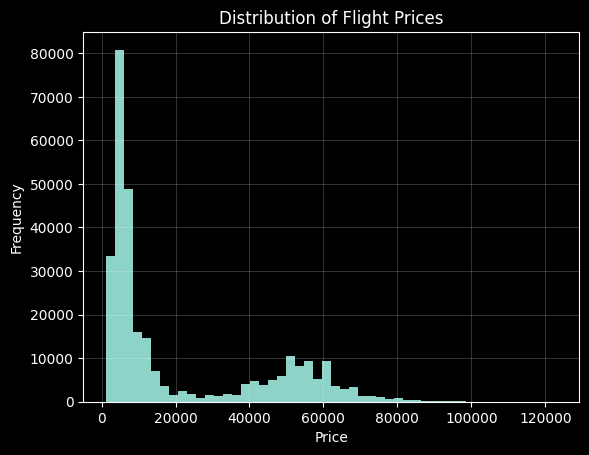

In [11]:
# Histogram with more control 

def hist1():
    a1c['price'].plot(kind='hist', bins=50, title='Distribution of Flight Prices')
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
    
hist1()

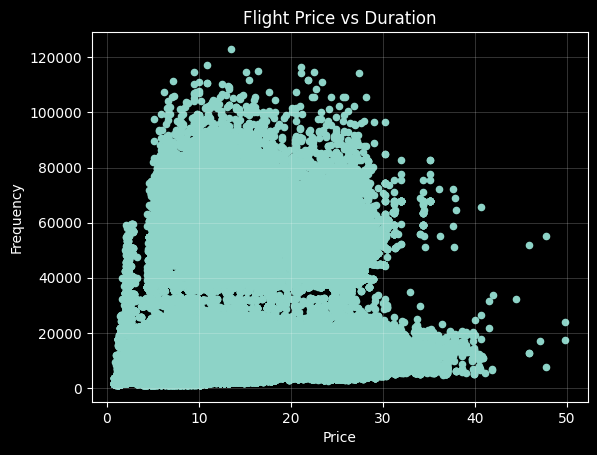

In [12]:
# Scatter plot with more control as above 

def sca1():
    a1c.plot(x='duration', y='price', kind='scatter', title='Flight Price vs Duration')
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

sca1()

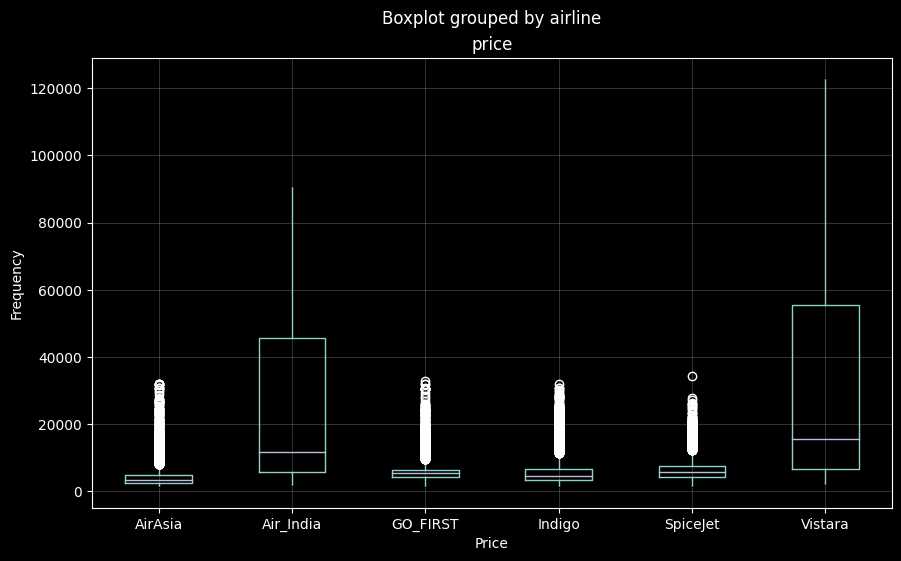

In [13]:
# Box Plot
def box1():
    a1c.boxplot(column='price', by='airline', figsize=(10, 6))
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

box1()

In [14]:
a1c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


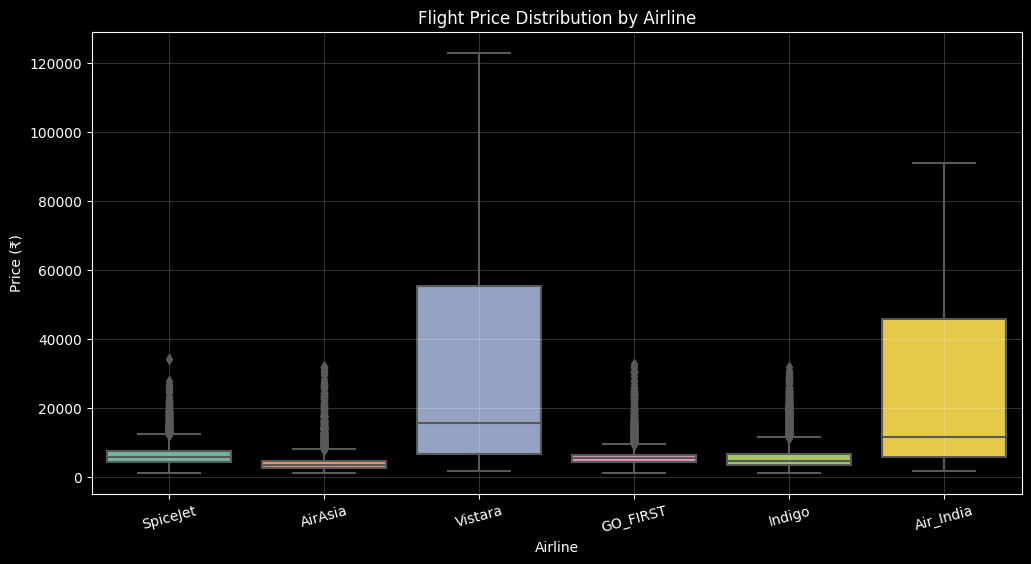

In [15]:
# Compare Price Distribution by airline
# Goal: Compare pricing strategies across airlines.

def cpda1():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=a1c, x='airline', y='price', palette='Set2')
    plt.title('Flight Price Distribution by Airline')
    plt.xticks(rotation=15)
    plt.ylabel('Price (₹)')
    plt.xlabel('Airline')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

cpda1()

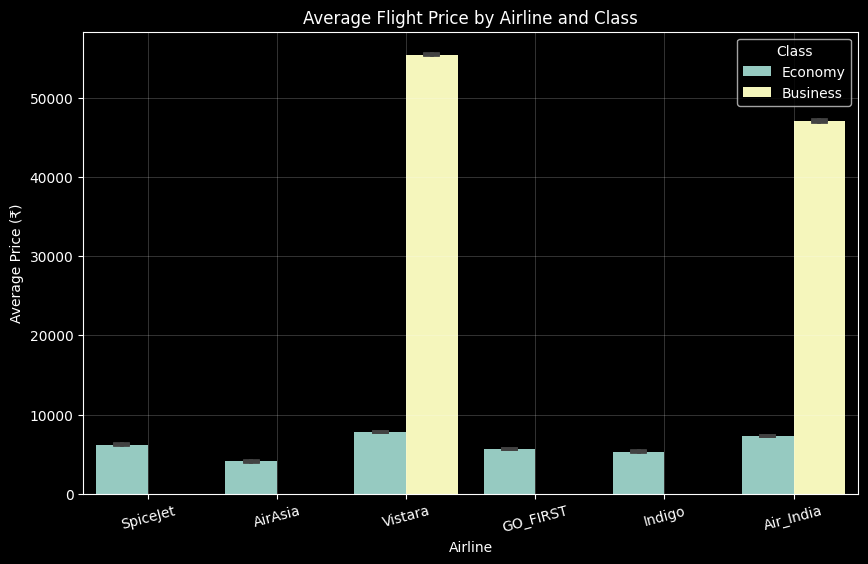

In [16]:
# Average flight price by airline and class
# Goal: Show price difference between Economy and Business class.

def afpac1():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=a1c, x='airline', y='price', hue='class', capsize=0.1)
    plt.title('Average Flight Price by Airline and Class')
    plt.ylabel('Average Price (₹)')
    plt.xlabel('Airline')
    plt.legend(title='Class')
    plt.xticks(rotation=15)
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

afpac1()

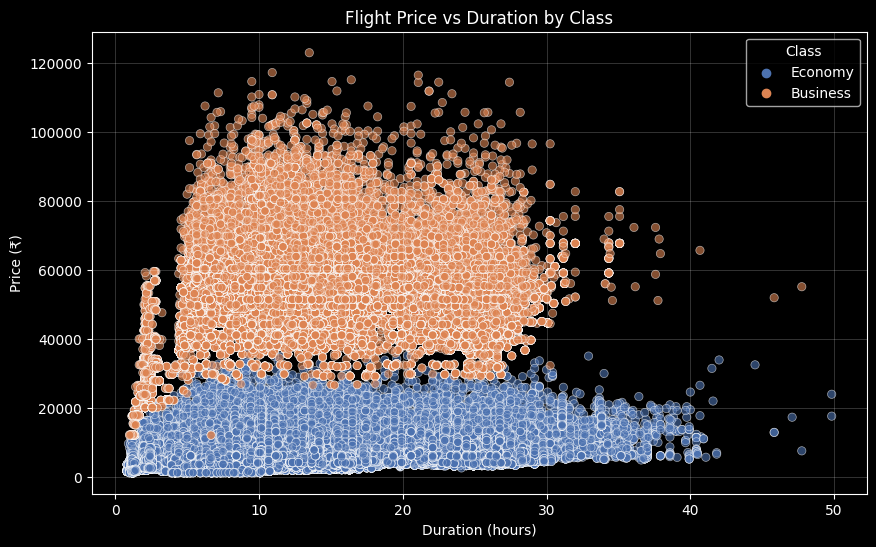

In [17]:
# Price vs Duration (Scatter Plot with Hue)
# Goal: Is longer duration = higher price?

def pds1():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=a1c, x='duration', y='price', hue='class', alpha=0.6, palette='deep')
    plt.title('Flight Price vs Duration by Class')
    plt.xlabel('Duration (hours)')
    plt.ylabel('Price (₹)')
    plt.legend(title='Class')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
plt.show()


pds1()

/tmp/ipykernel_36/862508280.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=a1c, x='days_left', y='price', hue='class', ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

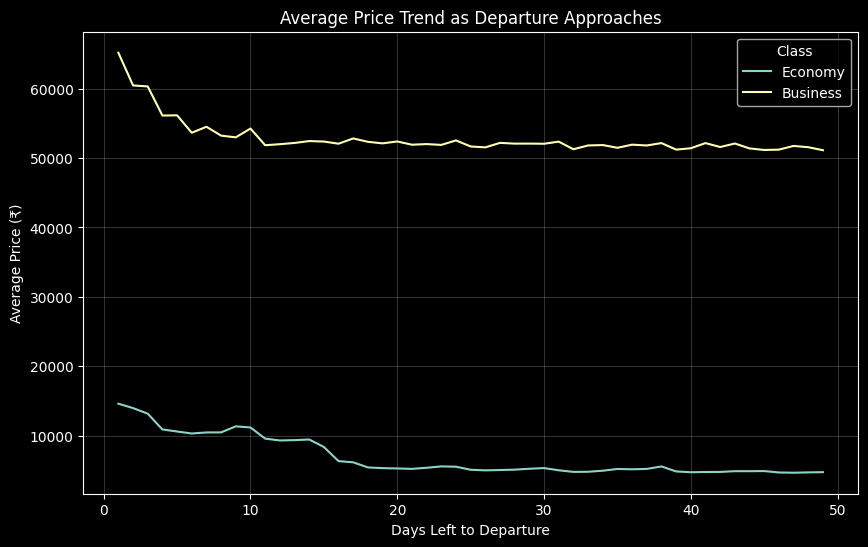

In [18]:
# Price vs Days Left to Departure (Line or Scatter)
# Goal: How does price change as flight date approaches?

def pdlp():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=a1c, x='days_left', y='price', hue='class', ci=None)
    plt.title('Average Price Trend as Departure Approaches')
    plt.xlabel('Days Left to Departure')
    plt.ylabel('Average Price (₹)')
    plt.legend(title='Class')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()
    

pdlp()

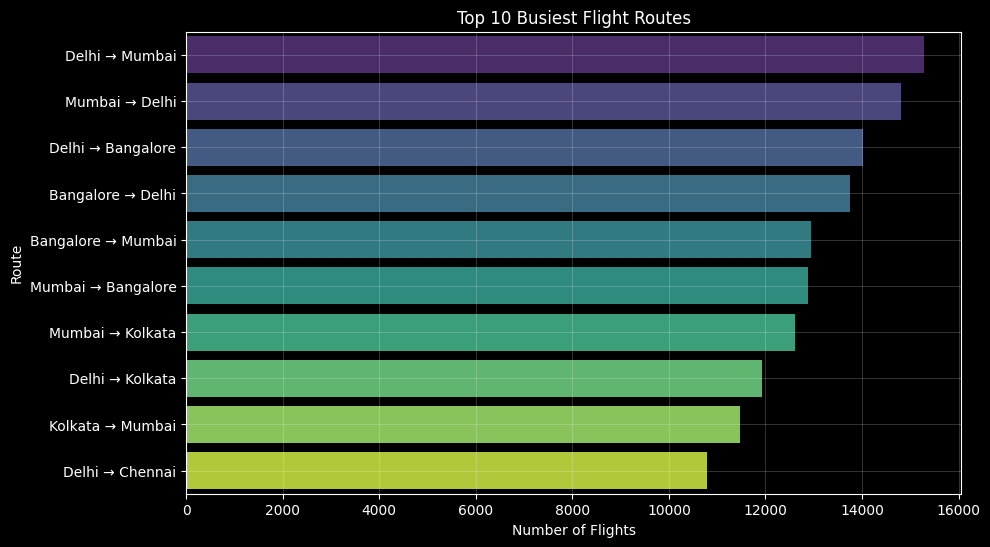

In [19]:
# Most Frequent Routes (Top Source → Destination Pairs
# Goal: Identify busiest flight routes.


def mfr1():
    # Create route column
    a1c['route'] = a1c['source_city'] + ' → ' + a1c['destination_city']
    
    # Top 10 routes
    top_routes = a1c['route'].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_routes.index, x=top_routes.values, palette='viridis')
    plt.title('Top 10 Busiest Flight Routes')
    plt.xlabel('Number of Flights')
    plt.ylabel('Route')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()


mfr1()

In [20]:
a1c

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi → Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi → Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi → Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi → Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai → Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai → Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai → Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai → Hyderabad


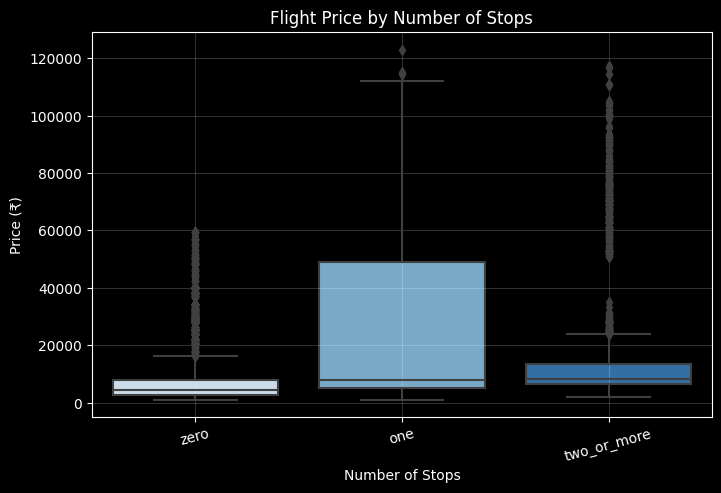

In [21]:
# Number of Stops vs Price (Bar or Box Plot)
# Goal: Does having stops reduce price?

def nsp1():
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=a1c, x='stops', y='price', palette='Blues')
    plt.title('Flight Price by Number of Stops')
    plt.xlabel('Number of Stops')
    plt.ylabel('Price (₹)')
    plt.xticks(rotation=15)
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

nsp1()

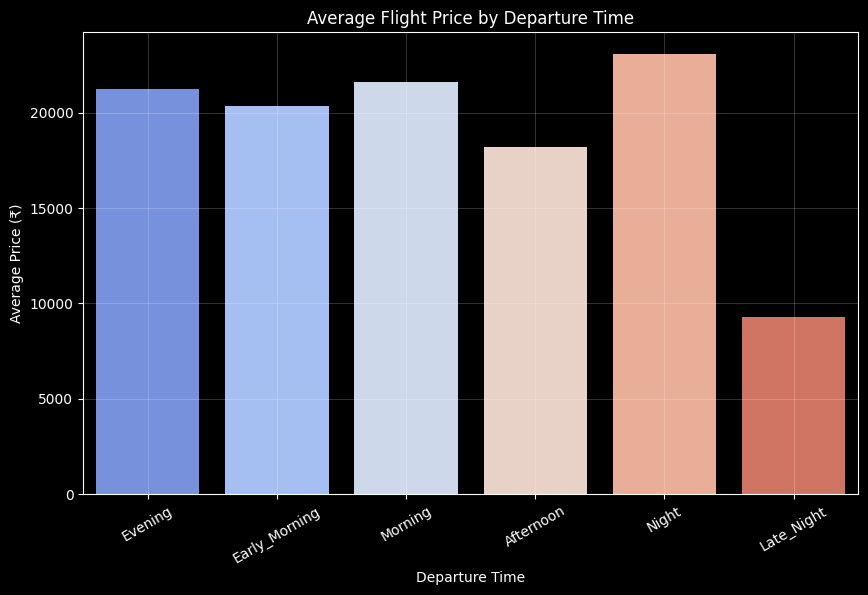

In [22]:
# Departure Time vs Price (Bar Plot)
# Goal: Are evening flights more expensive?

def dtp():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=a1c, x='departure_time', y='price', estimator='mean', errorbar=None, palette='coolwarm')
    plt.title('Average Flight Price by Departure Time')
    plt.xlabel('Departure Time')
    plt.ylabel('Average Price (₹)')
    plt.xticks(rotation=30)
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

dtp()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


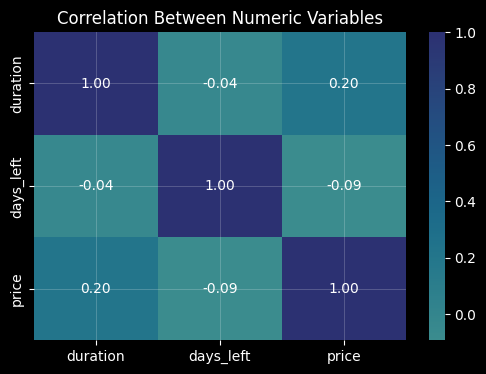

In [23]:
# Correlation Heatmap (Numeric Variables Only)
# Goal: See relationships between numeric fields.

def ch1():
    numeric_cols = a1c[['duration', 'days_left', 'price']]
    corr = numeric_cols.corr()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='crest', center=0, fmt='.2f')
    plt.title('Correlation Between Numeric Variables')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

ch1()

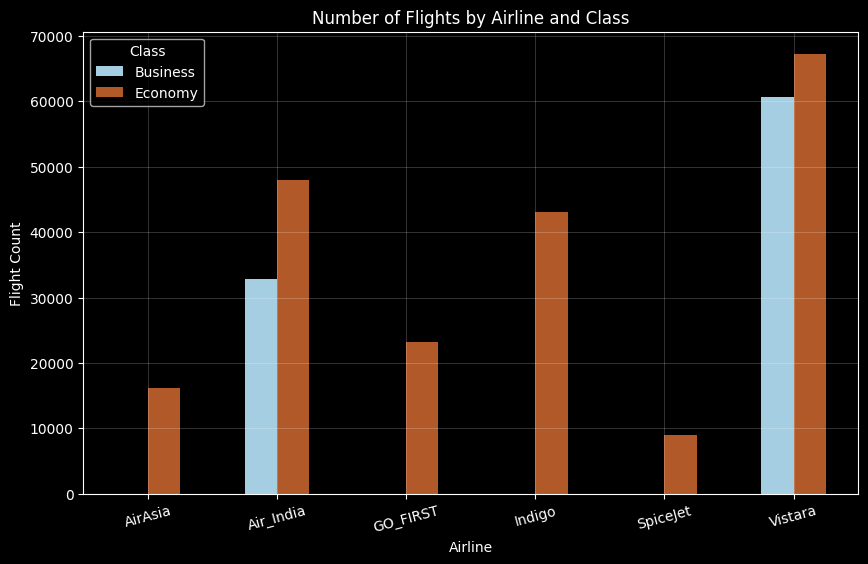

In [24]:
#  Count of Flights by Airline and Class
# Goal: Market share by airline and class.

def cfac():
    pd.crosstab(a1c['airline'], a1c['class']).plot(kind='bar', figsize=(10, 6), colormap='Paired')
    plt.title('Number of Flights by Airline and Class')
    plt.xlabel('Airline')
    plt.ylabel('Flight Count')
    plt.legend(title='Class')
    plt.xticks(rotation=15)
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

cfac()

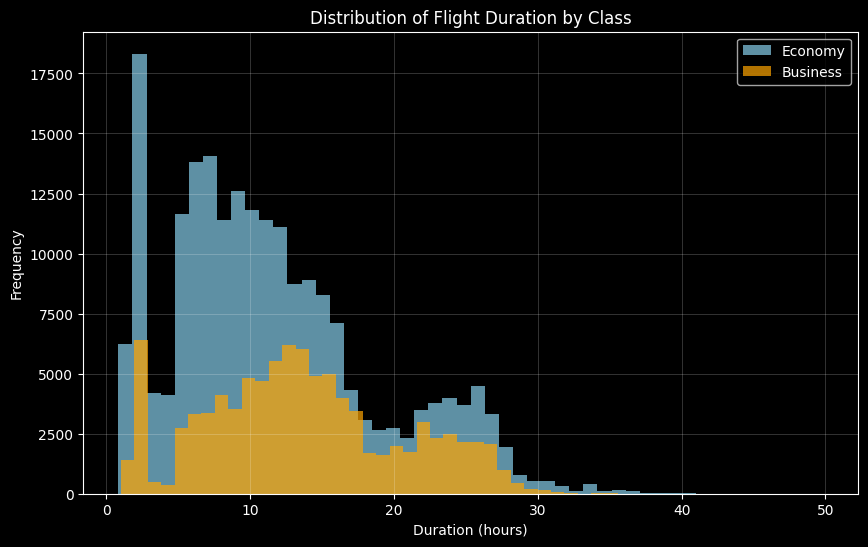

In [25]:
# Histogram of Flight Durations (by Class)
# Goal: Distribution of flight lengths.

def hofd1():
    plt.figure(figsize=(10, 6))
    a1c[a1c['class'] == 'Economy']['duration'].hist(bins=50, alpha=0.7, label='Economy', color='skyblue')
    a1c[a1c['class'] == 'Business']['duration'].hist(bins=50, alpha=0.7, label='Business', color='orange')
    plt.title('Distribution of Flight Duration by Class')
    plt.xlabel('Duration (hours)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

hofd1()

/tmp/ipykernel_36/1479604278.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=a1c, x='days_left', y='price', hue='class', ci=None, ax=axes[1, 1])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

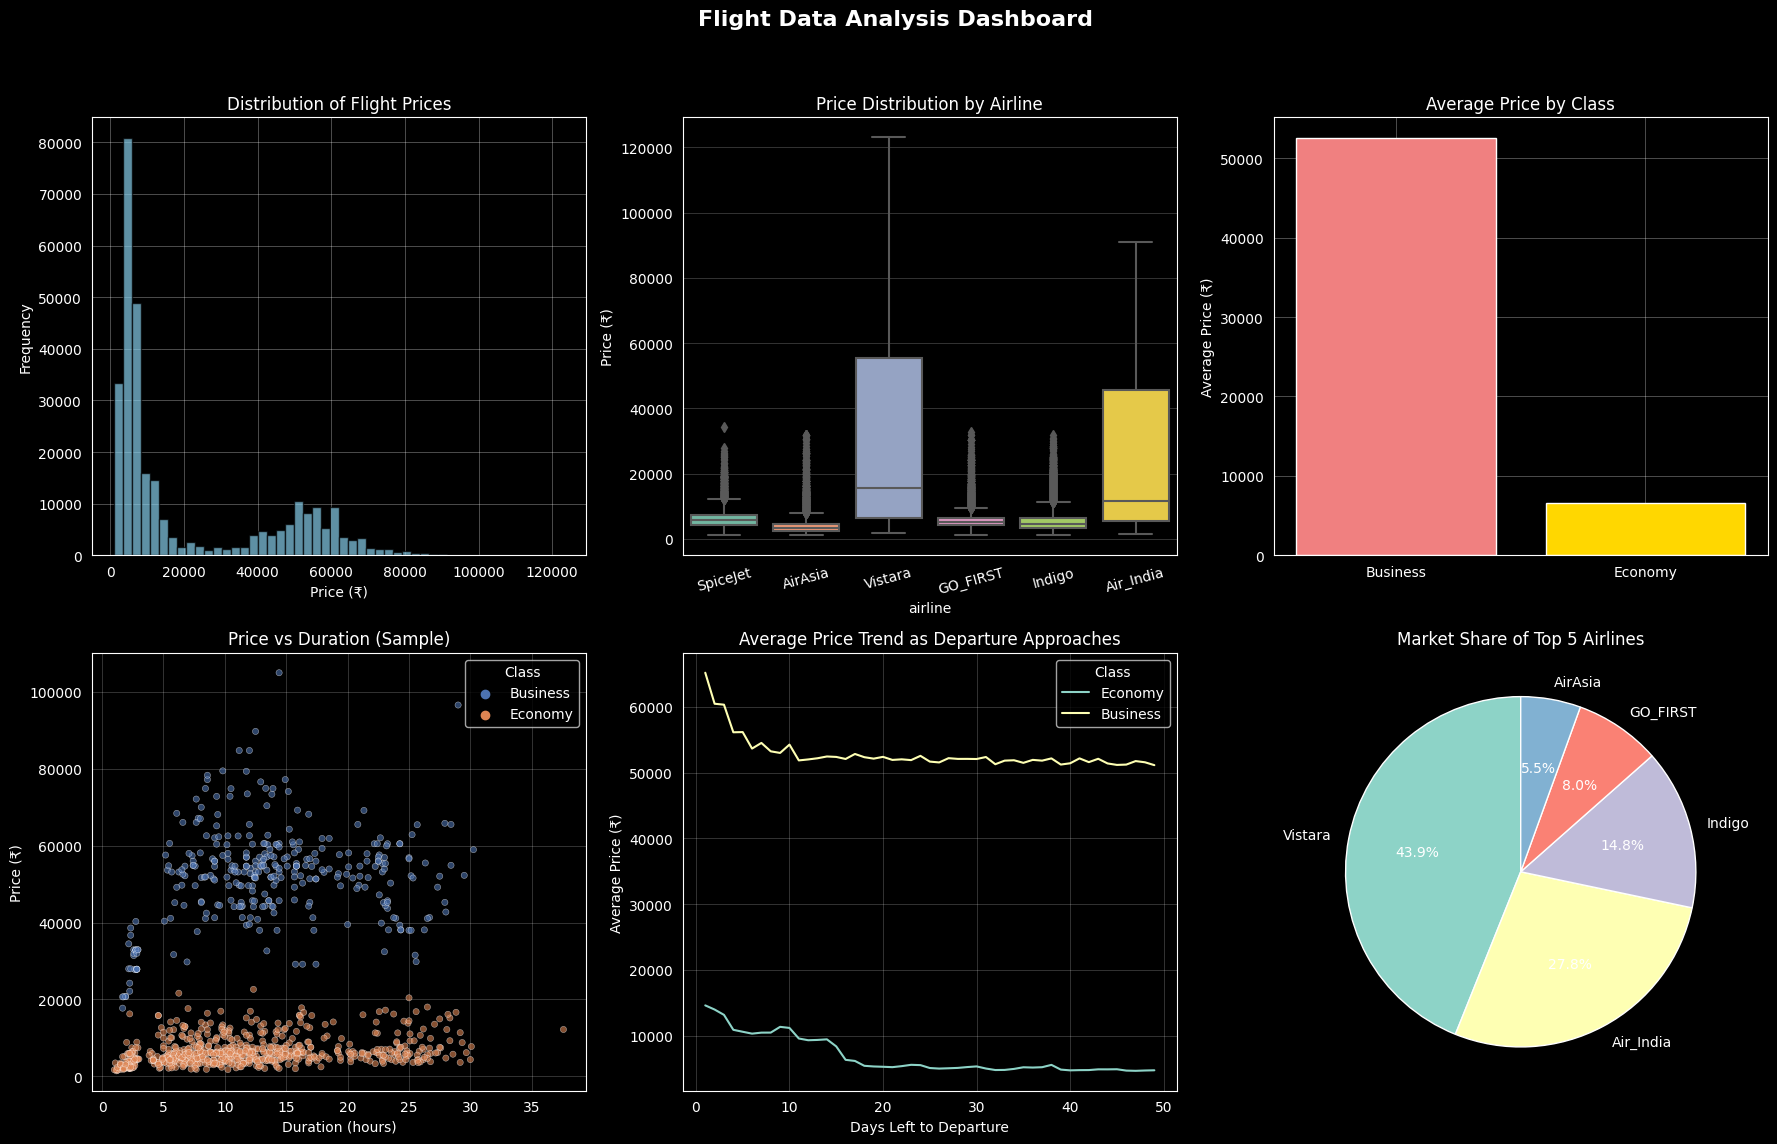

In [26]:
# Make sub plots 
# Set style for better-looking plots

def subp1():
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (18, 12)

    # 🔥 Set dark background style FIRST, before any plotting
    plt.style.use('dark_background')

    # Set global grid style
    plt.rcParams['axes.grid'] = True
    # plt.rcParams['grid.which'] = 'both'
    plt.rcParams['grid.linewidth'] = 0.7
    plt.rcParams['grid.alpha'] = 0.2
    
    # Create a figure with 2 rows and 3 columns of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # --- Plot 1: Price Distribution ---
    axes[0, 0].hist(a1c['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Distribution of Flight Prices')
    axes[0, 0].set_xlabel('Price (₹)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # --- Plot 2: Price by Airline (Boxplot) ---
    sns.boxplot(data=a1c, x='airline', y='price', ax=axes[0, 1], palette='Set2')
    axes[0, 1].set_title('Price Distribution by Airline')
    axes[0, 1].tick_params(axis='x', rotation=15)
    axes[0, 1].set_ylabel('Price (₹)')
    
    # --- Plot 3: Average Price by Class ---
    class_avg = a1c.groupby('class')['price'].mean()
    axes[0, 2].bar(class_avg.index, class_avg.values, color=['lightcoral', 'gold'])
    axes[0, 2].set_title('Average Price by Class')
    axes[0, 2].set_ylabel('Average Price (₹)')
    axes[0, 2].grid(True, alpha=0.3)
    
    # --- Plot 4: Price vs Duration (Scatter) ---
    sns.scatterplot(data=a1c.sample(1000), x='duration', y='price', hue='class', 
                    alpha=0.6, ax=axes[1, 0], palette='deep', s=20) # Sampled for speed
    axes[1, 0].set_title('Price vs Duration (Sample)')
    axes[1, 0].set_xlabel('Duration (hours)')
    axes[1, 0].set_ylabel('Price (₹)')
    axes[1, 0].legend(title='Class')
    
    # --- Plot 5: Price Trend by Days Left ---
    sns.lineplot(data=a1c, x='days_left', y='price', hue='class', ci=None, ax=axes[1, 1])
    axes[1, 1].set_title('Average Price Trend as Departure Approaches')
    axes[1, 1].set_xlabel('Days Left to Departure')
    axes[1, 1].set_ylabel('Average Price (₹)')
    axes[1, 1].legend(title='Class')
    
    # --- Plot 6: Top 5 Airlines by Count ---
    top_airlines = a1c['airline'].value_counts().head(5)
    axes[1, 2].pie(top_airlines.values, labels=top_airlines.index, autopct='%1.1f%%', startangle=90)
    axes[1, 2].set_title('Market Share of Top 5 Airlines')
    
    # Adjust layout to prevent overlap
    plt.suptitle('Flight Data Analysis Dashboard', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
    
    # Show the plot 
    plt.show()

subp1()


## Plotting Options 

In [27]:
# Working DS 
a1c

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi → Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi → Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi → Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi → Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai → Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai → Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai → Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai → Hyderabad


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

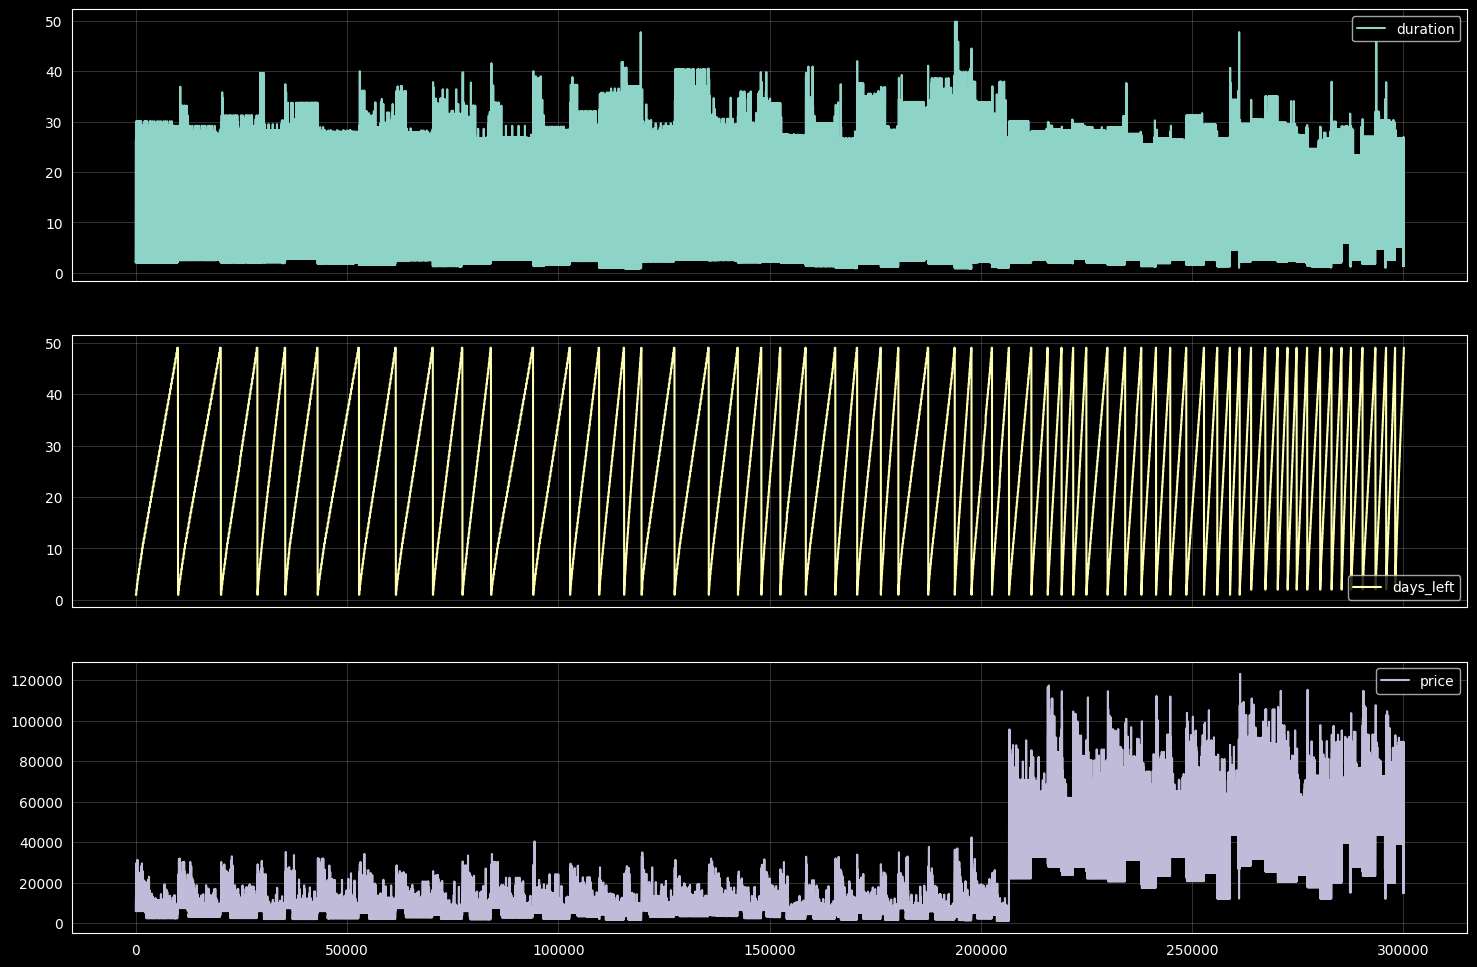

In [28]:
# Note the size has been set earlier - Splitting by plots - Note its not recommended to use this method , unless the data makes sense 

a1c.plot(kind = 'line', subplots = True)

array([<Axes: xlabel='Cost', ylabel='Columns'>,
       <Axes: xlabel='Cost', ylabel='Columns'>,
       <Axes: xlabel='Cost', ylabel='Columns'>], dtype=object)

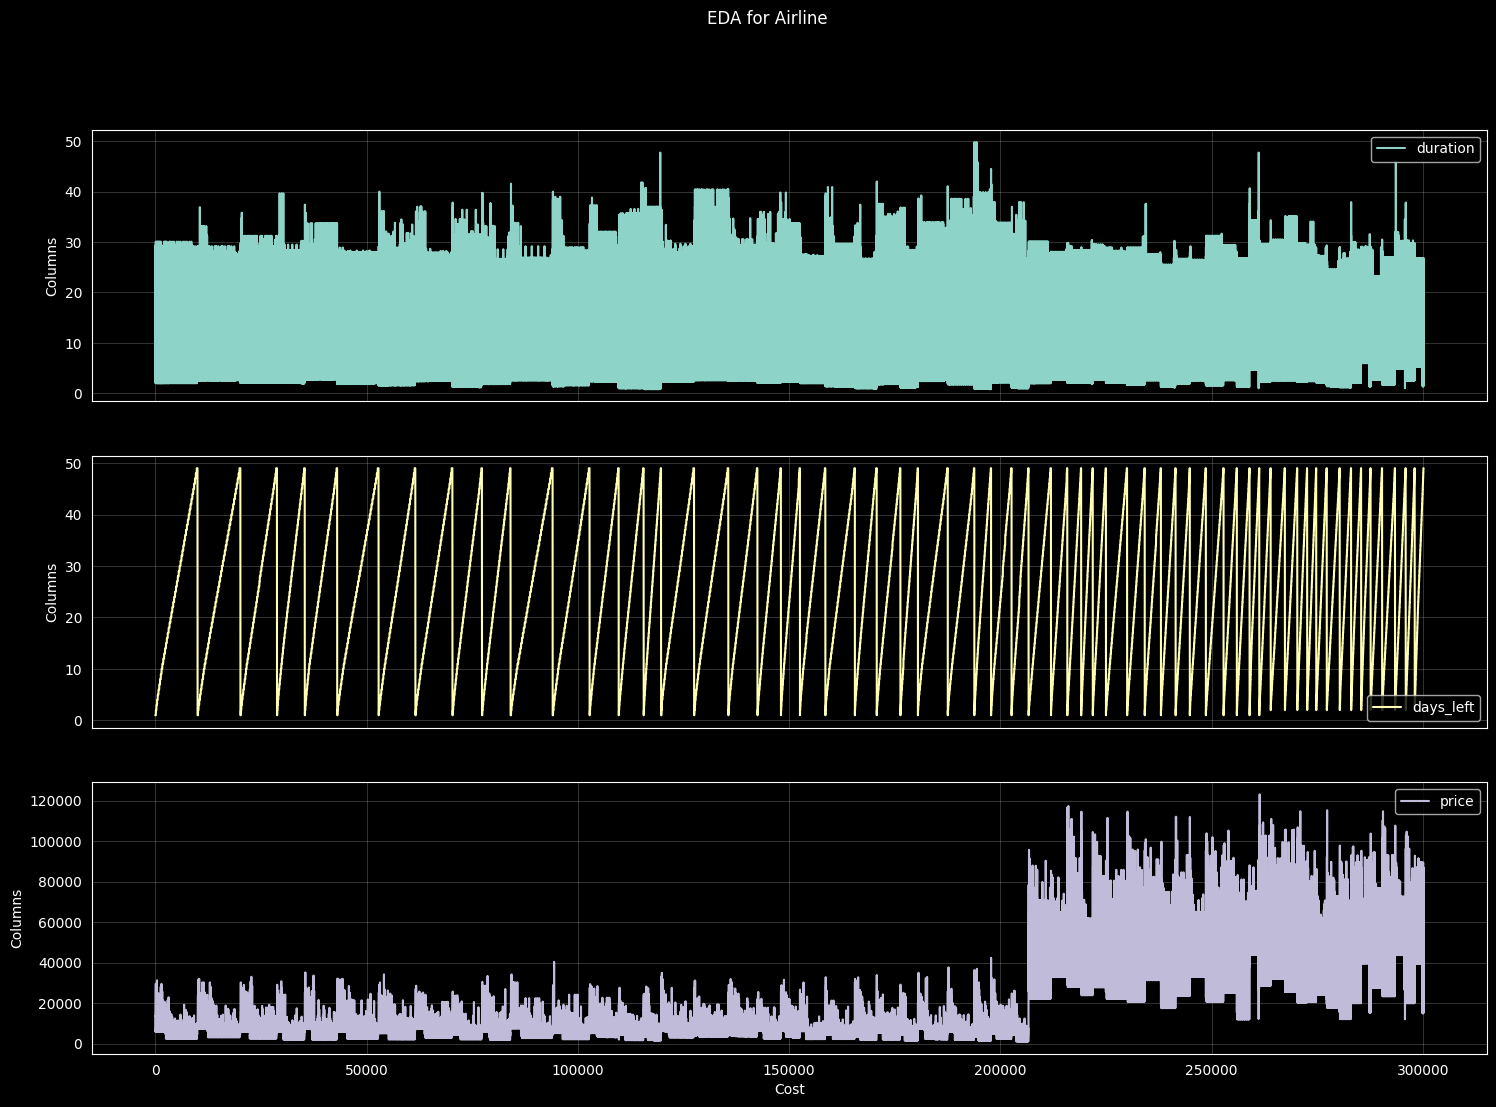

In [29]:
# Continuing 
a1c.plot(
    kind = 'line', 
    subplots = True ,
    title = 'EDA for Airline' ,
    xlabel = 'Cost' ,
    ylabel =  'Columns' , 
)

1. Changing data sets to world population
2. Smaller data set 

In [31]:
# Import world population data set 

URL = "/kaggle/input/world-population-dataset/world_population.csv"
po1 = pd.read_csv(URL)

In [32]:
po1

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


<Axes: >

<Figure size 600x400 with 0 Axes>

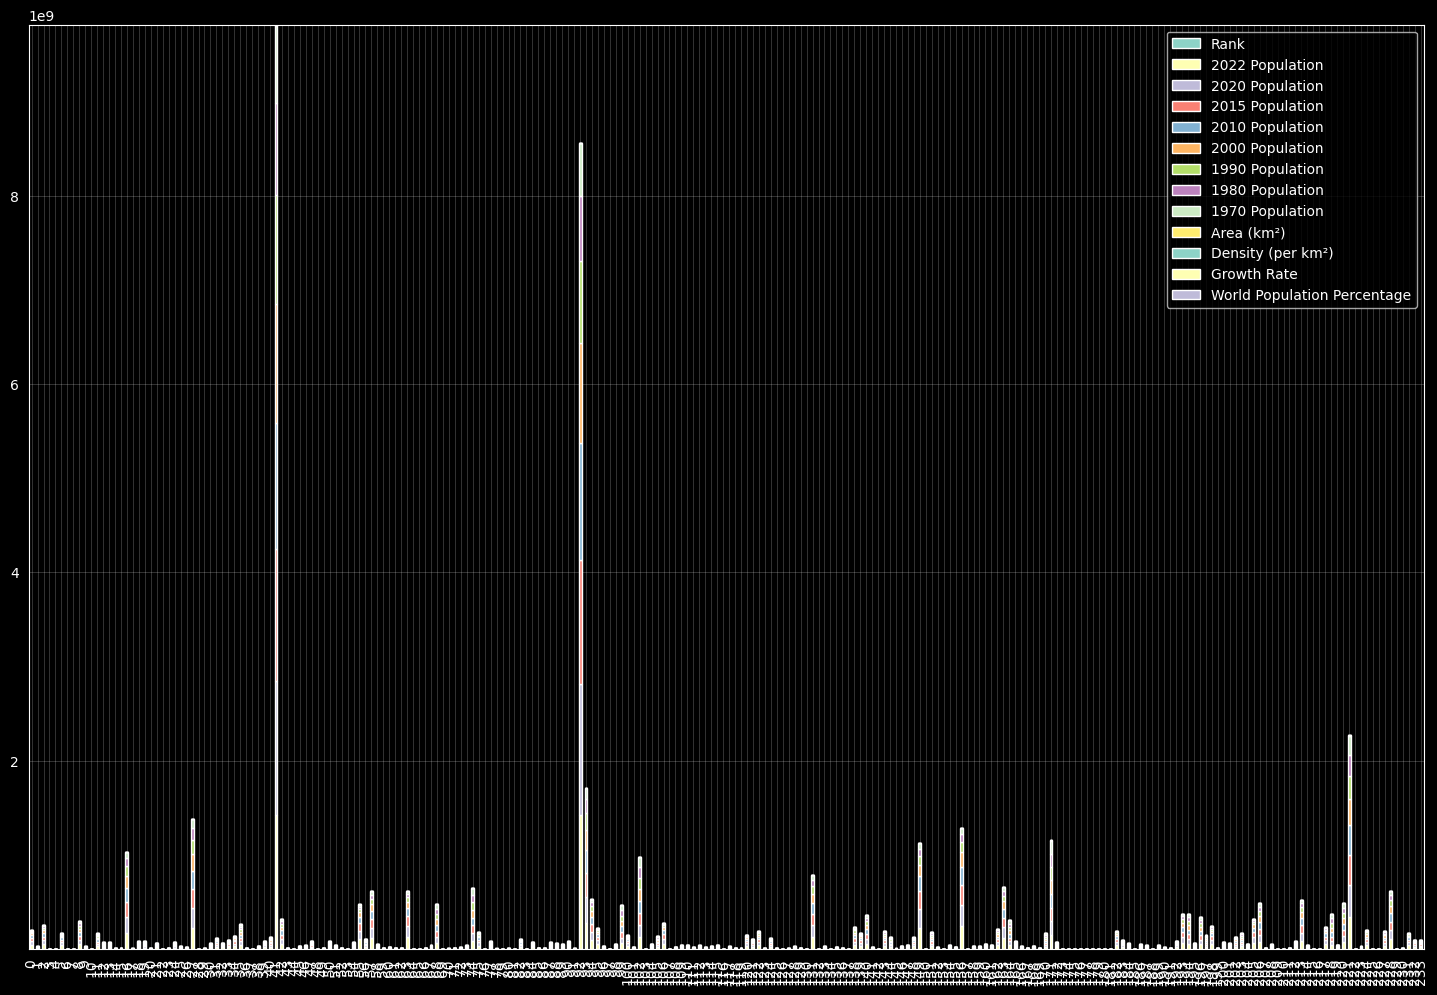

In [71]:
# Try Histogram Plot
plt.figure(figsize=(6, 4))
po1.plot(kind = 'bar', stacked = True)

<Axes: >

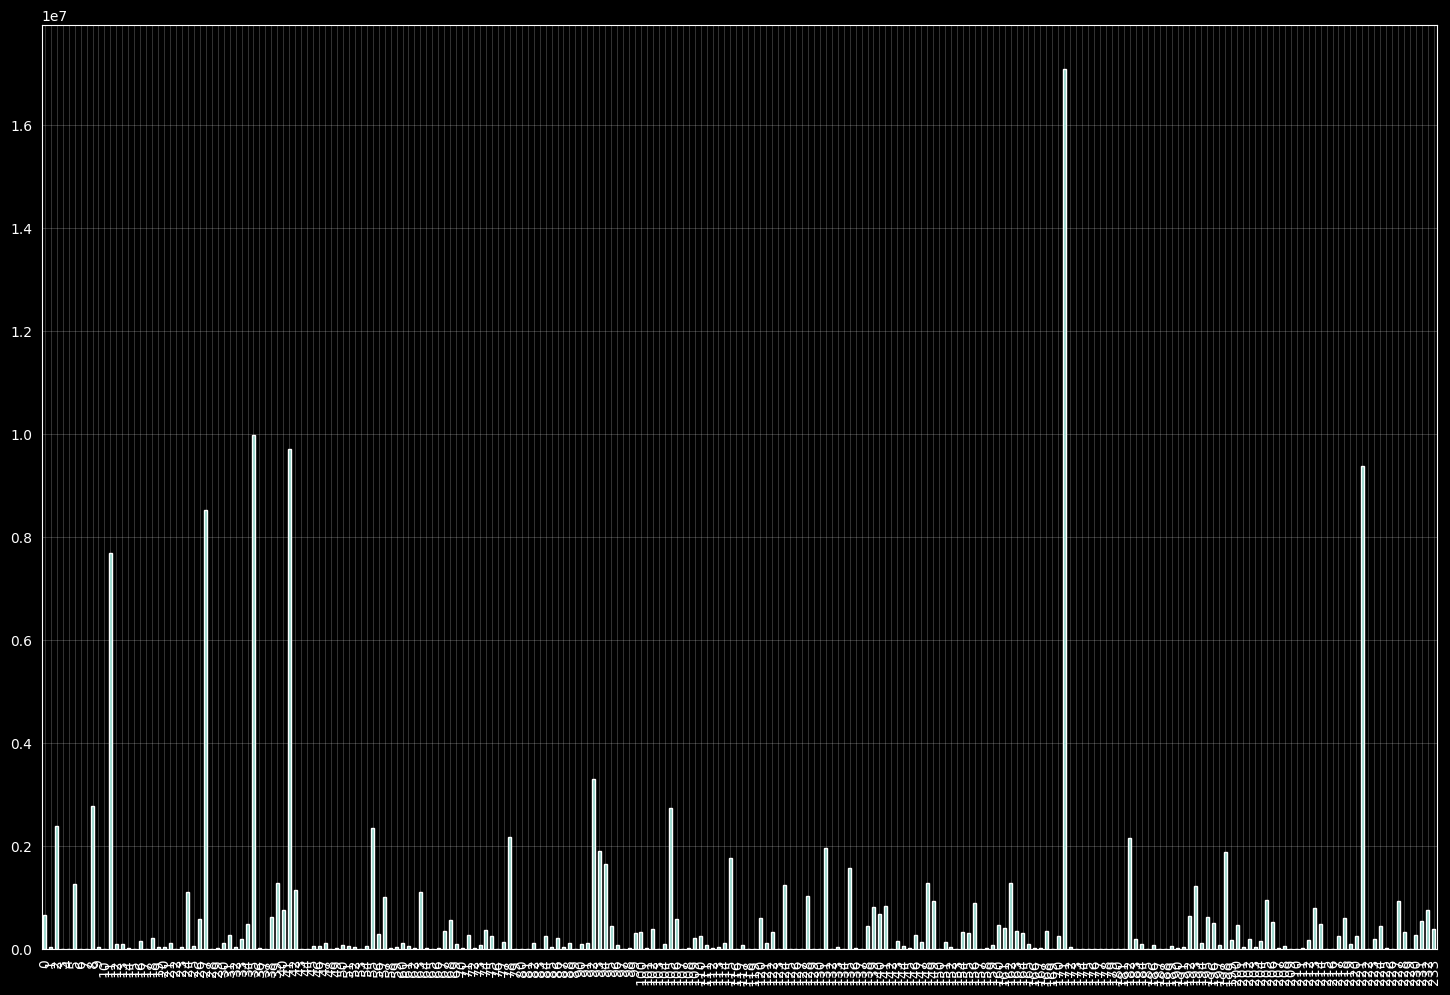

In [36]:
# Stacked plot by specific olumn
plt.figure(figsize=(6, 4))
po1['Area (km²)'].plot(kind = 'bar', stacked = True)

<Axes: >

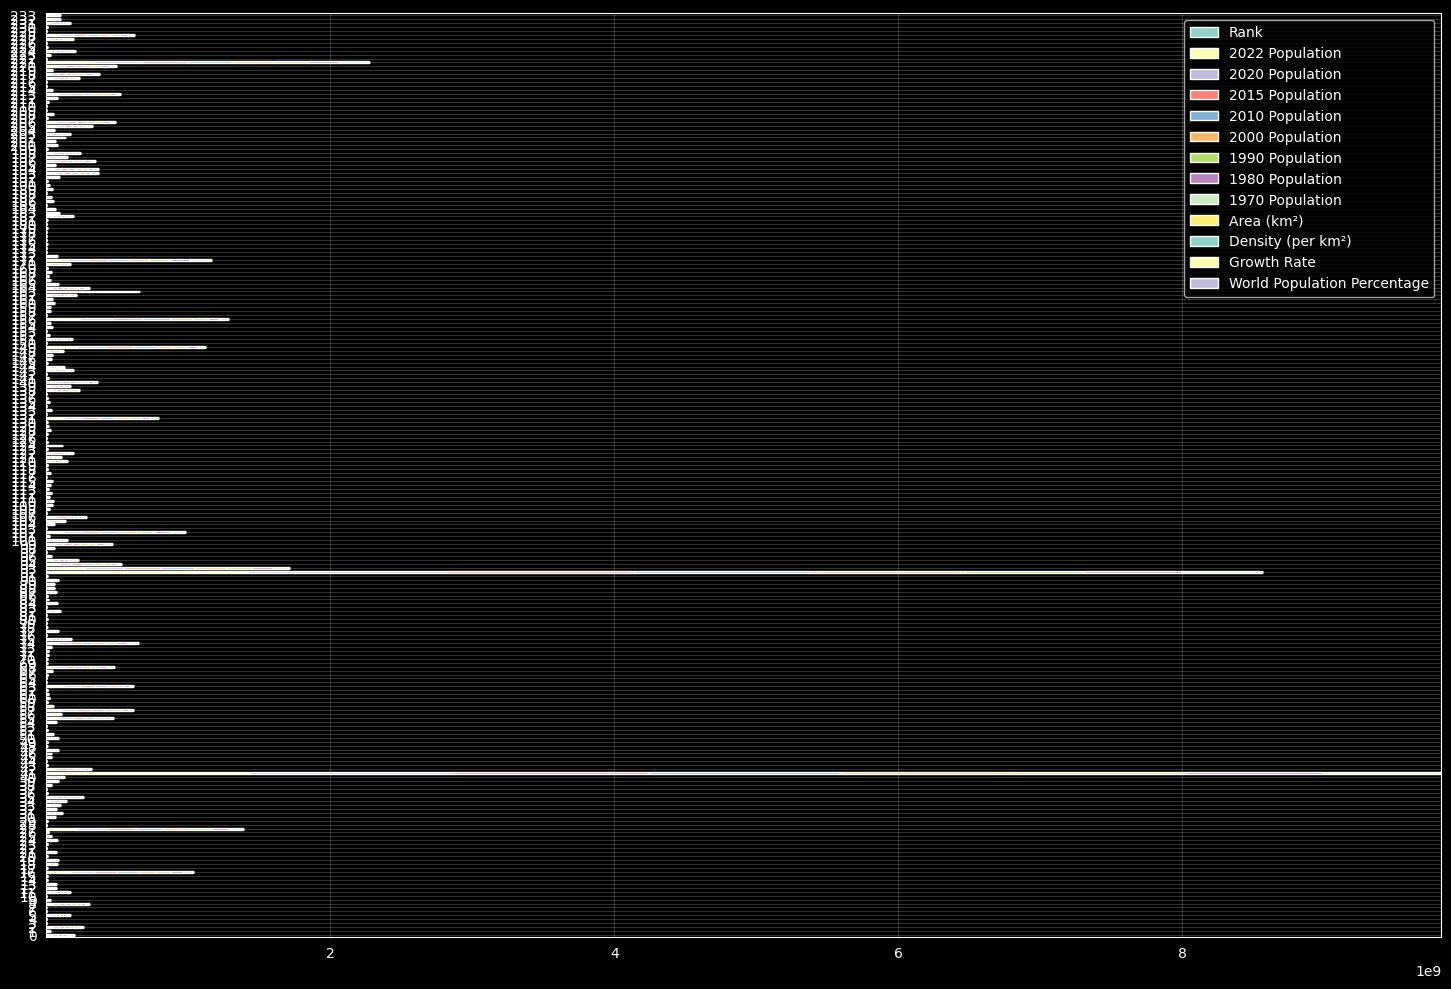

In [38]:
# Horizontal barchart
po1.plot.barh(stacked = True)

Change dataset again

In [2]:

URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
po2 = pd.read_csv(URL)

In [3]:
po2

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [18]:
# subsetting the number of rows to make it manageable

po2s = po2.head(20)

In [5]:
po2s

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Air_India,AI-540,Delhi,Night,one,Morning,Mumbai,Economy,11.42,2,12990
196,196,Air_India,AI-885,Delhi,Morning,one,Night,Mumbai,Economy,11.50,2,12990
197,197,Air_India,AI-762,Delhi,Night,one,Afternoon,Mumbai,Economy,16.17,2,12990
198,198,Air_India,AI-764,Delhi,Evening,one,Afternoon,Mumbai,Economy,19.50,2,12990


<Axes: >

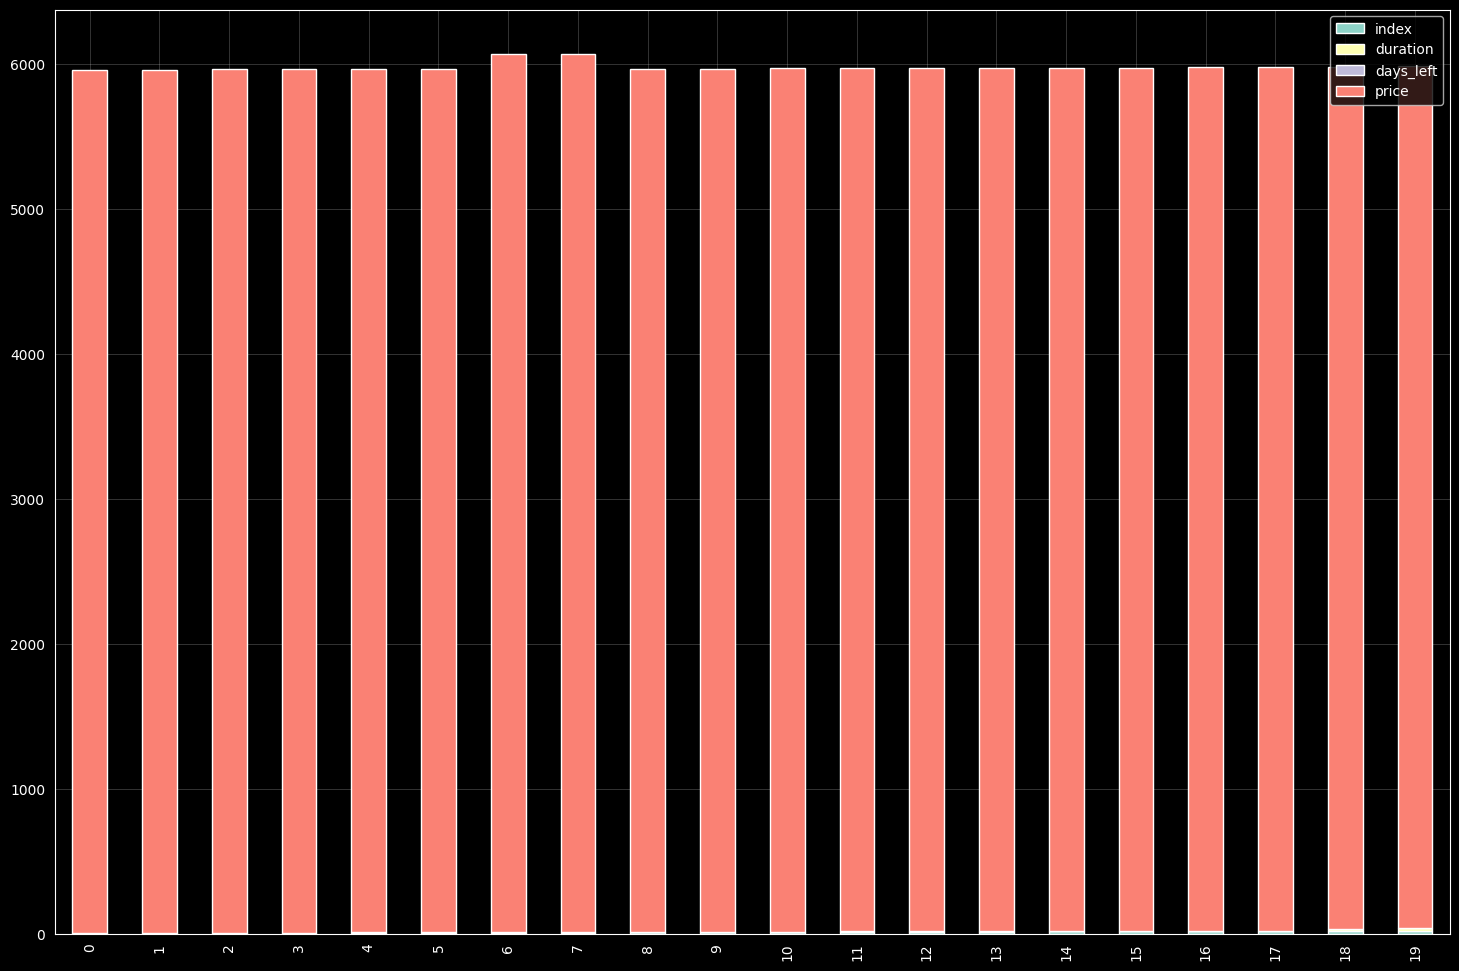

In [61]:
# Fix plt size
po2s.plot(kind = "bar", stacked=True)

<Axes: xlabel='duration', ylabel='price'>

<Figure size 600x400 with 0 Axes>

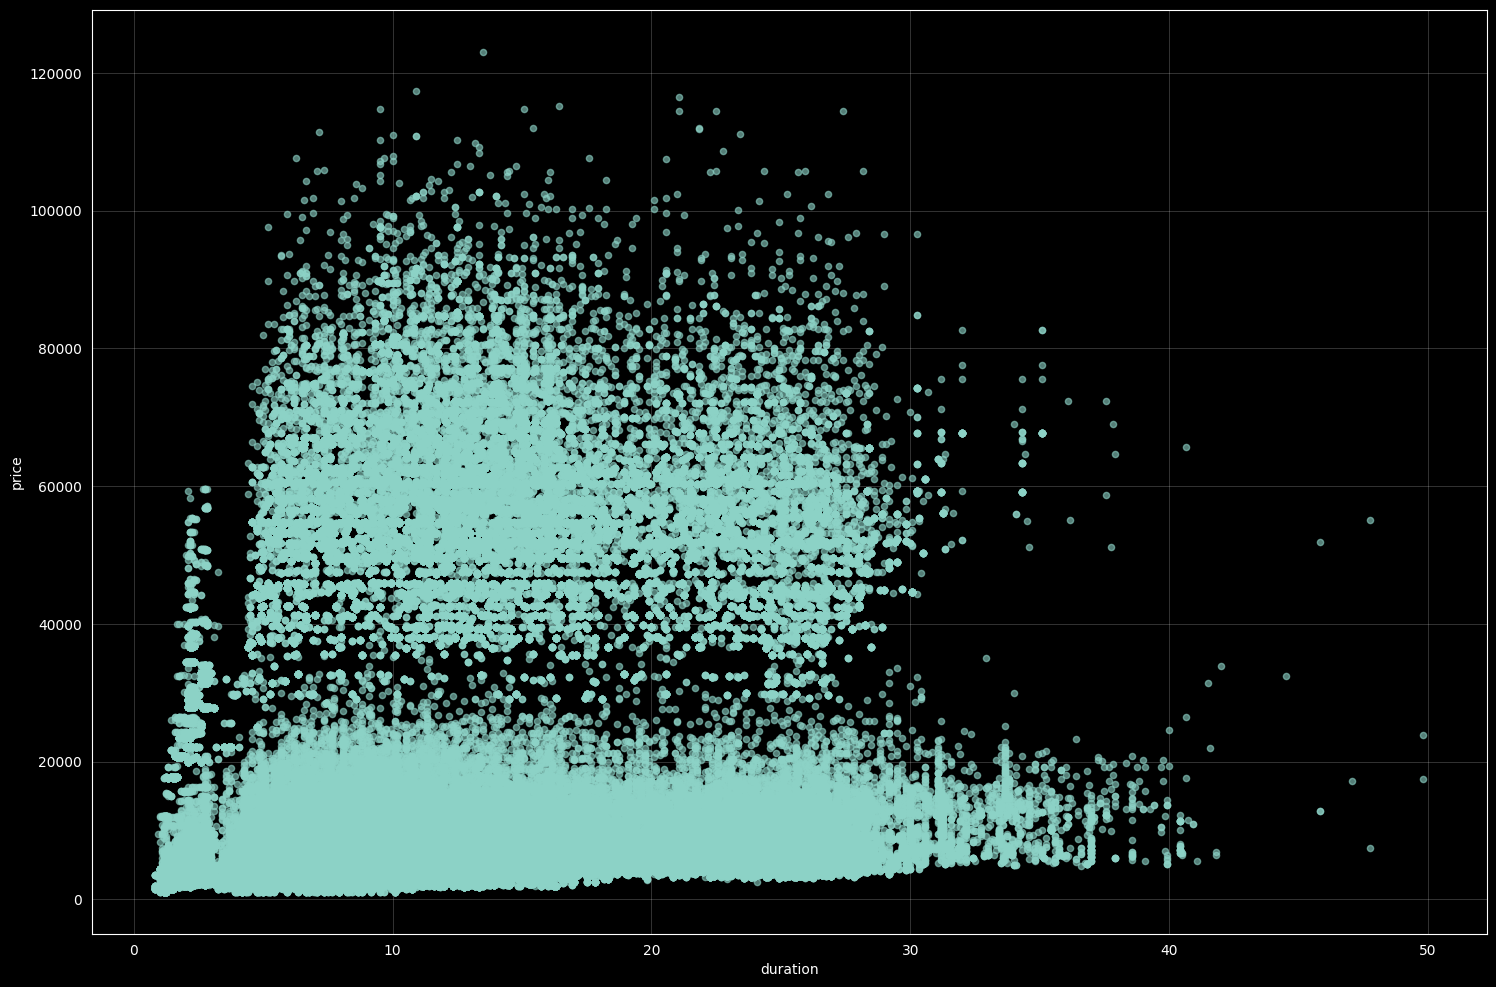

In [72]:
# Scatter plot
plt.figure(figsize=(6, 4))
po2.plot.scatter(x = "duration", y = "price", alpha=0.6,)

<Axes: ylabel='Frequency'>

<Figure size 600x400 with 0 Axes>

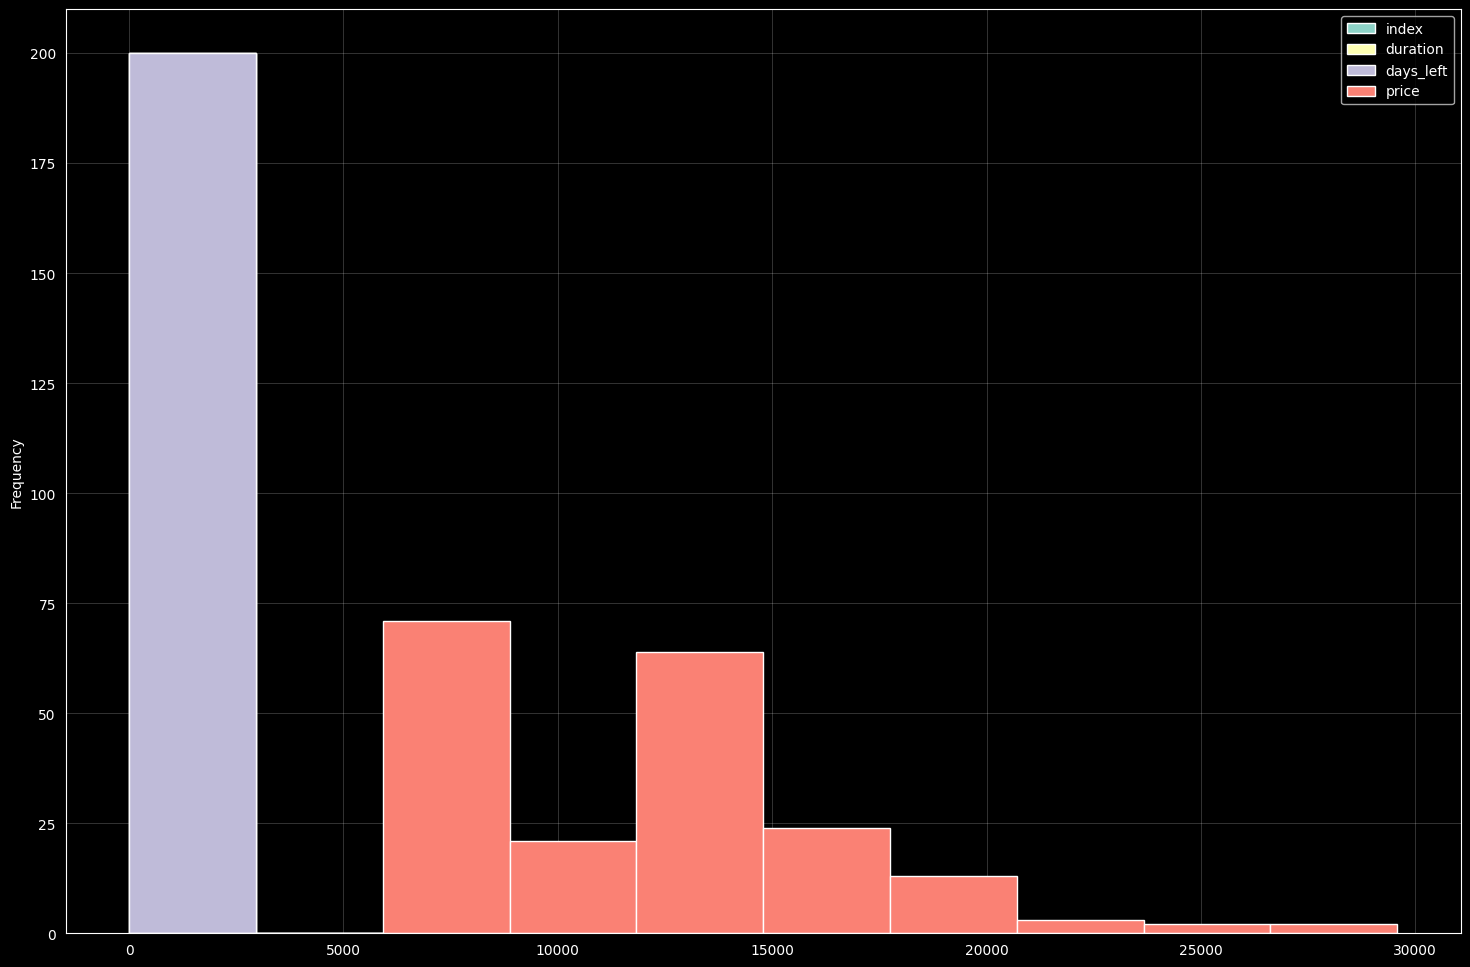

In [73]:
# histogram

plt.figure(figsize=(6, 4))
po2s.plot.hist()

<Axes: ylabel='Frequency'>

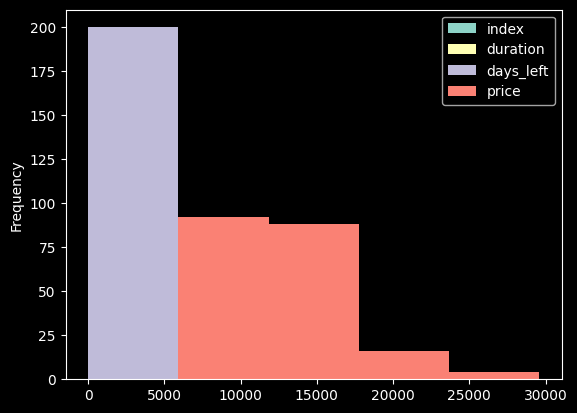

In [8]:
# Using bins 
po2s.plot.hist(bins = 5)

<Axes: >

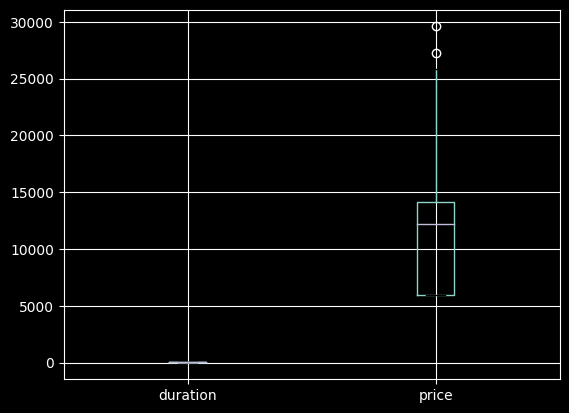

In [14]:
# Boxplots
po2s.boxplot(column = ['duration', 'price'])

<Axes: >

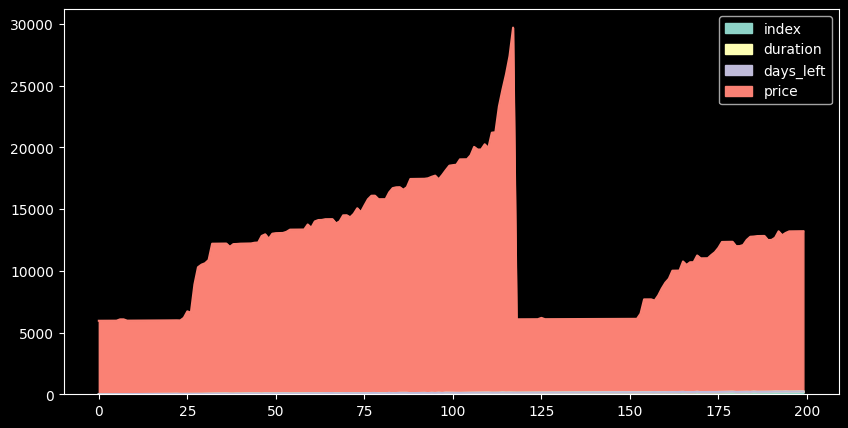

In [16]:
# area plot
po2s.plot.area(figsize = (10,5))

<Axes: ylabel='price'>

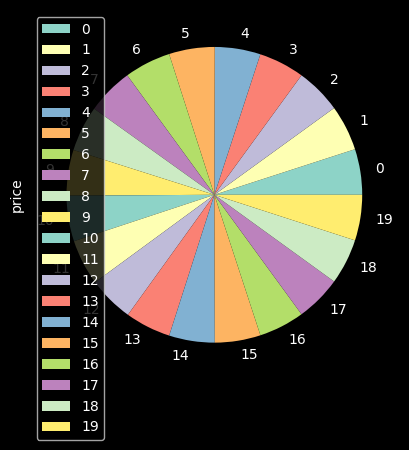

In [19]:
# piChart
po2s.plot.pie(y = 'price')